In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
acc=pd.read_csv('RawData/acc_exp01_user01.txt', sep=" ",header=None)

gyro=pd.read_csv('RawData/gyro_exp01_user01.txt', sep=" ",header=None)
labels=pd.read_csv('RawData/labels.txt', sep=" ",header=None)
label=labels[(labels[0] ==1 )& (labels[1]==1)]


In [3]:
new={}

newtarget=pd.DataFrame()
for i in range(len(label)):
    tw=[]
    for x in range (label.iloc[i,3], label.iloc[i,4]):
        tw.append(x)
    new['class']=label.iloc[i,2]
    new['interval']=tw
        
    cla=pd.DataFrame.from_dict(new)
    #print(cla)
    newtarget=pd.concat([newtarget, cla])    
len(newtarget)

13934

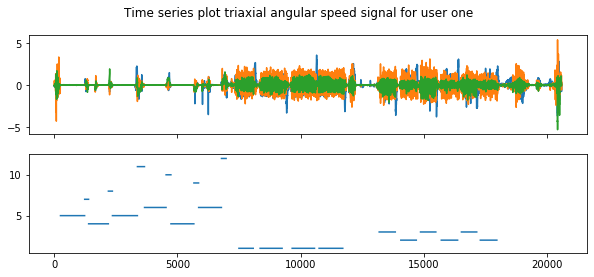

In [4]:
fclass=pd.merge(newtarget,gyro,how='right',left_on='interval',right_on=gyro.index)

fclass=fclass.sort_values(by=['interval'])


fig, axes = plt.subplots(2,sharex=True, figsize=(10,4))

fig.suptitle('Time series plot triaxial angular speed signal for user one')
#fig.legend(label, loc = 'upper center')

axes[1].plot(fclass['interval'],fclass['class'],label='Classes')
#lines, labels = fig.axes[1].get_legend_handles_labels()
    
#fig.legend(lines, labels, loc = 'lower center')
axes[0].plot(fclass['interval'],fclass[0],label='x')
axes[0].plot(fclass['interval'],fclass[1],label='y')
axes[0].plot(fclass['interval'],fclass[2],label='z')

(array([  1.,   2.,   0.,   0.,   3.,   0.,   0.,   1.,   0.,   0.,   1.,
          0.,   0.,   0.,   0.,   0.,   4.,   9.,   7.,  15., 150., 890.,
        716., 122.,  28.,   8.,   2.,   4.,   2.,   1.,   0.,   1.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,
          0.,   2.,   1.,   0.,   0.,   0.,   0.,   1.,   1.,   1.,   1.,
          1.,   2.,   3.,   0.,   1.,   1.,   1.,   0.,   2.,   1.,   0.,
          0.,   2.,   0.,   1.,   0.,   0.,   1.,   0.,   0.,   0.,   1.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          1.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          2.]),
 array([-0.23823744, -0.22726325, -0.21628905, -0.20531486, -0.19434067,
        -0.18336647, -0.17239228, -0.16141808, -0.15044389, -0.1394697 ,
        -0.1284955 , -0.11752131, -0.10654711, -0.09557292, -0.08459873,
        -0.07362453, -0.06265034, -0.05167615, -0.04070195, -0.02972776,
        -0.01875356, -0.00

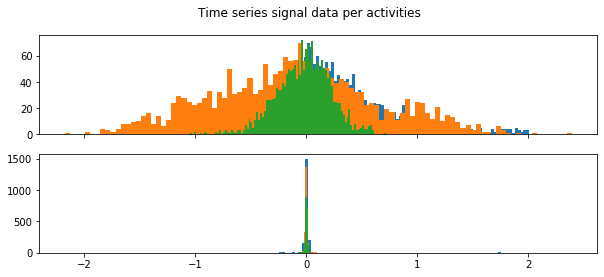

In [5]:
uclass=fclass[fclass['class']==2]
wclass=fclass[fclass['class']==5]
fig, axes = plt.subplots(2,sharex=True,figsize=(10,4))

fig.suptitle('Time series signal data per activities')
axes[0].hist(uclass[0],bins=100)

axes[0].hist(uclass[1],bins=100)

axes[0].hist(uclass[2],bins=100,label='walking upstair')
#lines, labels = fig.axes[0].get_legend_handles_labels()
#fig.legend(lines, labels, loc = 'upper right')
axes[1].hist(wclass[0],bins=100)

axes[1].hist(wclass[1],bins=100)

axes[1].hist(wclass[2],bins=100,label='laying')

In [6]:
# Phase I 
# 1) Load Data
X_train= pd.read_csv('X_train.txt', sep=" ", header=None)
y_train= pd.read_csv('y_train.txt',sep=" ",header=None)
X_test=pd.read_csv('X_test.txt', sep=" ", header=None)
y_test=pd.read_csv('y_test.txt', sep=" ",header=None)


In [7]:
y_label=pd.read_csv('activity_labels.txt',header=None)
y_label[1]=y_label[0].apply((lambda x:x[0])).apply(lambda x:int(x))
col_name=pd.read_csv('features.txt',header=None)
#y=pd.merge(y_train,y_label,on=index)
y_trainn=pd.merge(y_train, y_label, left_on=[0], right_on=[1])
y_trains=y_trainn['0_y']
X_train.head()

,0,1,2,3,4,5,6,7,8,9,...,551,552,553,554,555,556,557,558,559,560
0,0.043580,-0.005970,-0.035054,-0.995381,-0.988366,-0.937382,-0.995007,-0.988816,-0.953325,-0.794796,...,-0.012236,-0.314848,-0.713308,-0.112754,0.030400,-0.464761,-0.018446,-0.841559,0.179913,-0.051718
1,0.039480,-0.002131,-0.029067,-0.998348,-0.982945,-0.971273,-0.998702,-0.983315,-0.974000,-0.802537,...,0.202804,-0.603199,-0.860677,0.053477,-0.007435,-0.732626,0.703511,-0.845092,0.180261,-0.047436
2,0.039978,-0.005153,-0.022651,-0.995482,-0.977314,-0.984760,-0.996415,-0.975835,-0.985973,-0.798477,...,0.440079,-0.404427,-0.761847,-0.118559,0.177899,0.100699,0.808529,-0.849230,0.180610,-0.042271
3,0.039785,-0.011809,-0.028916,-0.996194,-0.988569,-0.993256,-0.996994,-0.988526,-0.993135,-0.798477,...,0.430891,-0.138373,-0.491604,-0.036788,-0.012892,0.640011,-0.485366,-0.848947,0.181907,-0.040826
4,0.038758,-0.002289,-0.023863,-0.998241,-0.986774,-0.993115,-0.998216,-0.986479,-0.993825,-0.801982,...,0.137735,-0.366214,-0.702490,0.123320,0.122542,0.693578,-0.615971,-0.848164,0.185124,-0.037080


In [8]:
y_label

,0,1
0,1 WALKING,1
1,2 WALKING_UPSTAIRS,2
2,3 WALKING_DOWNSTAIRS,3
3,4 SITTING,4
4,5 STANDING,5
5,6 LAYING,6
6,7 STAND_TO_SIT,7
7,8 SIT_TO_STAND,8
8,9 SIT_TO_LIE,9
9,10 LIE_TO_SIT,1


In [9]:
# 2)*train test split
from sklearn.model_selection import train_test_split
X_train1, X_test1, y_train1, y_test1 = train_test_split(
X_train,y_train, test_size=0.20, random_state=0, shuffle = True)

In [10]:
#3) identify if there is missing data
# Concatenate train & test


dataset = pd.concat(objs=[X_train, X_test], axis=0)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10929 entries, 0 to 3161
Columns: 561 entries, 0 to 560
dtypes: float64(561)
memory usage: 46.9 MB


In [11]:
total=dataset.isnull().sum().sort_values(ascending=False)
percent = (dataset.isnull().sum()/dataset.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head()

,Total,Percent
560,0,0.0
183,0,0.0
189,0,0.0
188,0,0.0
187,0,0.0


In [8]:
# 4)*using ‘k-NN impute' to fill missing data if there is 
import numpy as np
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=3)
print(imputer.fit_transform(X_train))

[[ 0.04357967 -0.00597022 -0.03505434 ... -0.84155851  0.17991281
  -0.05171842]
 [ 0.03948004 -0.00213128 -0.02906736 ... -0.8450924   0.18026111
  -0.04743634]
 [ 0.03997778 -0.00515272 -0.02265071 ... -0.84923013  0.18060956
  -0.04227136]
 ...
 [ 0.03745094 -0.00272442  0.02100941 ... -0.77956634  0.24912145
   0.04707077]
 [ 0.04401105 -0.00453578 -0.0512422  ... -0.78560327  0.24640867
   0.03170003]
 [ 0.06895376  0.00181032 -0.08032343 ... -0.78369253  0.24678499
   0.04298129]]


In [12]:
# 5)identify unbanlance data
m=len(y_train)/12
y_train.groupby([0]).size()



0
1     1226
2     1073
3      987
4     1293
5     1423
6     1413
7       47
8       23
9       75
10      60
11      90
12      57
dtype: int64

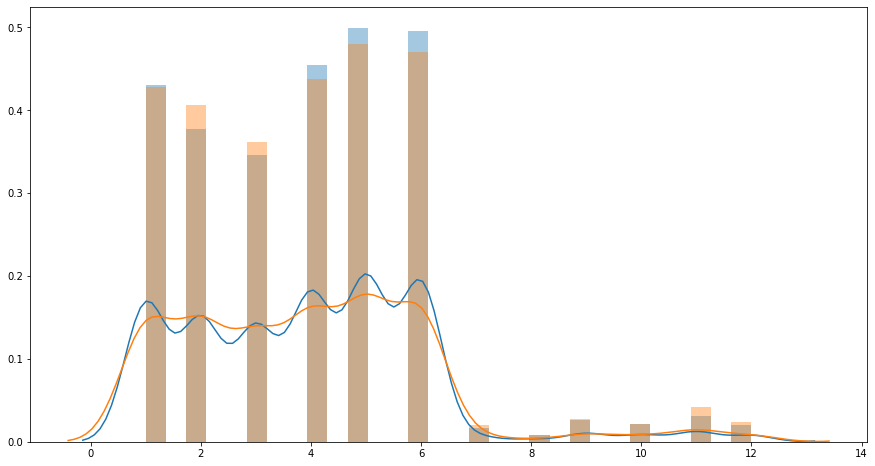

In [13]:
import seaborn as sns
plt.figure(figsize=(15,8))
sns.distplot(y_train, bins =30)
sns.distplot(y_test,bins=30)

In [14]:
#6) using SMOTE sampling to make data more balanced

from imblearn.over_sampling import SMOTE
y=y_train.values
 
smote = SMOTE(kind = "regular")
X_sm, y_sm = smote.fit_sample(X_train, y_train.values.ravel())
len(X_sm)
X_sm.shape
X_sm_test,y_sm_test=smote.fit_sample(X_test,y_test.values.ravel())

C:\Users\xiaoy\Anaconda4\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
C:\Users\xiaoy\Anaconda4\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.ensemble.bagging module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)
C:\Users\xiaoy\Anaconda4\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.ensemble.base module is  deprecated in version 0.22 and will be removed in

In [16]:
# 7)Identify which columns/variables are numerical and which are categorical


num_cols = dataset._get_numeric_data().columns

num_cols


Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
            551, 552, 553, 554, 555, 556, 557, 558, 559, 560],
           dtype='int64', length=561)

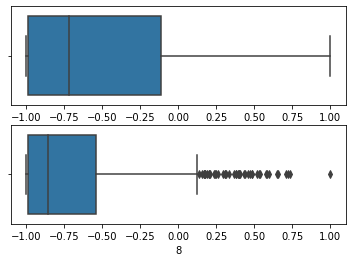

In [17]:
#8.1) identify outlier, change outliers
import seaborn as sns
plt.subplot(2,1,1)
sns.boxplot(X_train)
plt.subplot(2,1,2)
sns.boxplot(X_train[8])



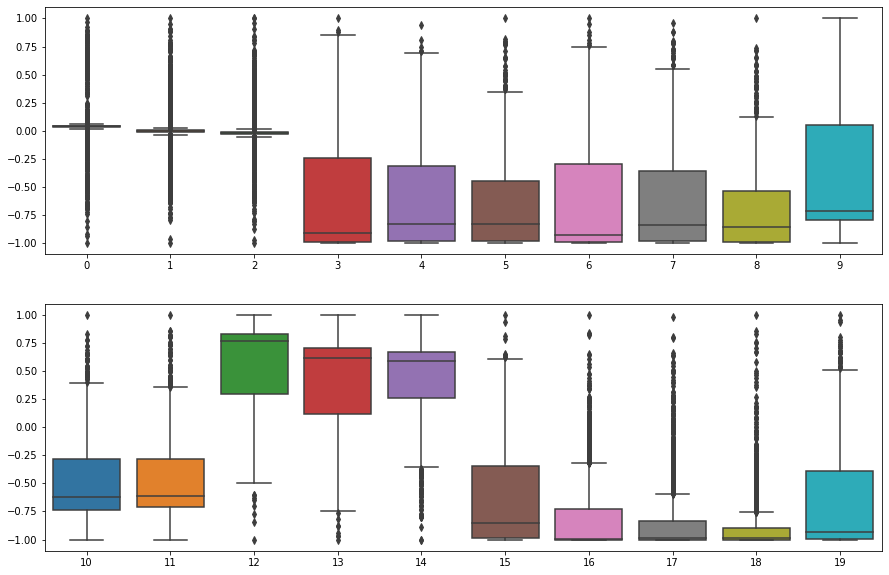

In [18]:
plt.figure(figsize=(15,10))
plt.subplot(2,1,1)
sns.boxplot(data=X_train.iloc[:,0:10])
plt.subplot(2,1,2)
sns.boxplot(data=X_train.iloc[:,10:20])


In [19]:
X_train[8].describe()

count    7767.000000
mean       -0.740154
std         0.272619
min        -1.000000
25%        -0.986661
50%        -0.852735
75%        -0.540521
max         1.000000
Name: 8, dtype: float64

In [20]:
import numpy as np
# it looks like there is a lot of outlier
# we will replace the outlier with 75% value if it is too large, with 25% if it is too small
X_train[8]=np.where(X_train[8]>=-0.054,-0.054,X_train[8])

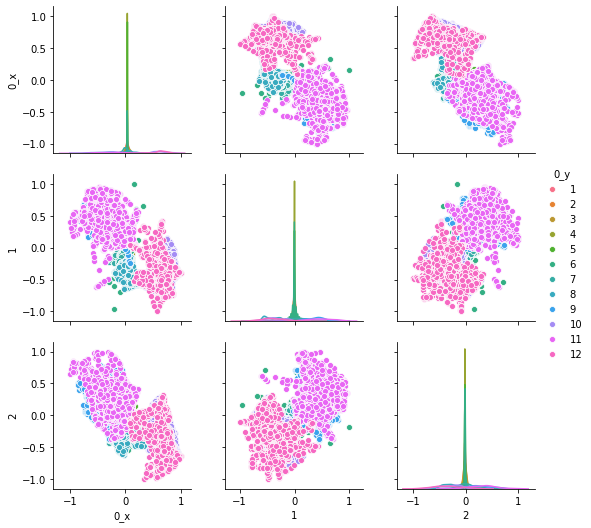

In [21]:
#corelations between features
import seaborn as sns
import pandas as pd
new_df = pd.merge(pd.DataFrame(X_sm), pd.DataFrame(y_sm),  how='left', left_index=True, right_index = True)
#new_df.head()
sns.pairplot (new_df,vars=["0_x",1,2],hue='0_y')


In [22]:
#hypothesis, if feature 0>0.9 ,y will be 4, feature0(-0.5-0.9) feature 5
new_dfyy=len(new_df[(new_df[2]>0.5)&(new_df['0_y']==4)])
new_dfyn=len(new_df[(new_df[2]>0.5)&(new_df['0_y']!=4)])
new_dfny=len(new_df[(new_df[2]<0.5)&(new_df['0_y']==4)])
new_dfnn=len(new_df[(new_df[2]<0.5)&(new_df['0_y']!=4)])

import scipy.stats as stats
oddsratio, pvalue = stats.fisher_exact([[new_dfyy,new_dfyn], [new_dfny, new_dfnn]])
pvalue

5.2433928505496616e-23

In [23]:
#9)Apply principal components analysis to just input variable
from sklearn.decomposition import PCA

pca = PCA(n_components=0.8)
x_pca = pca.fit_transform(X_sm)
X_sm.shape, x_pca.shape

((17076, 561), (17076, 14))

In [47]:
# Phase II: Pre-processing
#1)numerical columns
from sklearn import preprocessing

scaler = preprocessing.StandardScaler().fit(X_train)
X_Scaled=scaler.transform(X_train)
X_testp=scaler.transform(X_test)

#from sklearn.preprocessing import RobustScaler
#transformer = RobustScaler(with_centering=True,quantile_range=(25.0, 75.0)).fit(X_sm)
#X_Scaled=transformer.transform(X_sm)
#X_testp=transformer.transform(X_sm_test)


In [61]:
#Phase III: Build a initial-model (with some guess parameters)
#1) baseline model using multinomial logistic  regression

from sklearn.linear_model import LogisticRegression

clfl = LogisticRegression(random_state=0,multi_class='multinomial',max_iter=5000).fit(X_Scaled, y_train.values.ravel())
clfl.predict(X_testp)

clfl.predict_proba(X_testp)

clfl.score(X_testp, y_test.values.ravel())

0.941808981657179

In [51]:
#2)randomforest model
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=18, max_features=10,n_estimators=360,random_state=0,oob_score=True)
clf.fit(X_Scaled, y_train.values.ravel())
clf.feature_importances_

clf.predict(X_testp)
clf.score( X_testp, y_test.values.ravel())

0.9244149272612271

In [62]:
#Phase IV: Tune model parameters & evaluate
#1)tune with gridserch cv
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import  accuracy_score,make_scorer
rf = RandomForestClassifier( random_state=0)
from sklearn.model_selection import GridSearchCV
scorer = make_scorer(accuracy_score)
parameters = { 'max_features':[10, 20],'max_depth':[18,10],'n_estimators':[360,300]}

grid_obj= GridSearchCV(estimator=rf, cv=5,param_grid=parameters,scoring=scorer)

grid_fit = grid_obj.fit(X_Scaled, y_train.values.ravel())
# Get the estima
best_clf = grid_fit.best_estimator_

In [63]:
print(best_clf)

best_predictions = best_clf.predict(X_testp)
best_clf.score(X_testp,y_test)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=18, max_features=10,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)


0.9253636938646427

<Figure size 7200x1440 with 0 Axes>

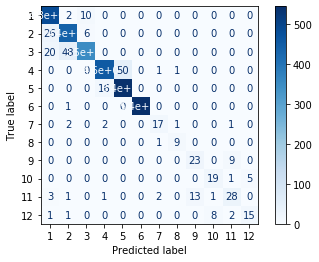

In [64]:
from sklearn.metrics import plot_confusion_matrix
plt.figure(figsize=(100,20))
plot_confusion_matrix(best_clf, X_testp, y_test,
                                 cmap=plt.cm.Blues)



In [65]:
from sklearn.metrics import roc_auc_score
y_prob = best_clf.predict_proba(X_testp)

#macro_roc_auc_ovo = roc_auc_score(y_test, y_prob, multi_class="ovo",
#                                  average="macro")
#weighted_roc_auc_ovo = roc_auc_score(y_test, y_prob, multi_class="ovo",
#                                     average="weighted")
macro_roc_auc_ovr = roc_auc_score(y_test, y_prob, multi_class="ovr",average="macro")
weighted_roc_auc_ovr = roc_auc_score(y_test, y_prob, multi_class="ovr",
                                     average="weighted")
#print("One-vs-One ROC AUC scores:\n{:.6f} (micro),\n{:.6f} "
#      "(weighted by prevalence)"
#      .format(macro_roc_auc_ovo, weighted_roc_auc_ovo))
print("One-vs-Rest ROC AUC scores:\n{:.6f} (macro),\n{:.6f} "
      "(weighted by prevalence)"
      .format(macro_roc_auc_ovr, weighted_roc_auc_ovr))

One-vs-Rest ROC AUC scores:
0.996045 (macro),
0.996375 (weighted by prevalence)


In [66]:
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import label_binarize
from sklearn.metrics import f1_score
# Compute ROC curve and ROC area for each class
# Binarize the output
y = label_binarize(y_test, classes=[1, 2,3,4,5,6,7,8,9,10,11,12])
n_classes = y.shape[1]
y_score=f1_score(y_test, best_clf.predict(X_testp),average=None)


yscore=best_clf.predict_proba(X_testp)
from sklearn.metrics import roc_curve, auc
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(12):
    fpr[i], tpr[i], _ = roc_curve(y[:, i], yscore[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

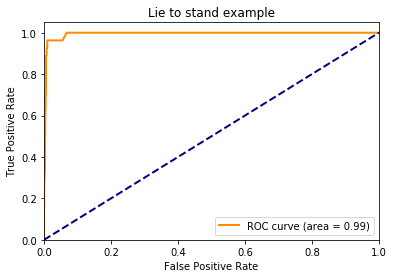

In [67]:
fpr["micro"], tpr["micro"], _ = roc_curve(y.ravel(), yscore.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
from scipy import interp
plt.figure()
lw = 2
plt.plot(fpr[11], tpr[11], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[2])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Lie to stand example')
plt.legend(loc="lower right")
plt.show()

In [68]:
from sklearn.metrics import classification_report

print(classification_report(y_test, best_clf.predict(X_testp)))

              precision    recall  f1-score   support

           1       0.91      0.98      0.94       496
           2       0.89      0.93      0.91       471
           3       0.96      0.84      0.89       420
           4       0.96      0.90      0.93       508
           5       0.92      0.97      0.94       556
           6       1.00      1.00      1.00       545
           7       0.81      0.74      0.77        23
           8       0.82      0.90      0.86        10
           9       0.64      0.72      0.68        32
          10       0.68      0.76      0.72        25
          11       0.68      0.57      0.62        49
          12       0.75      0.56      0.64        27

    accuracy                           0.93      3162
   macro avg       0.83      0.82      0.82      3162
weighted avg       0.93      0.93      0.92      3162



In [69]:
importances=best_clf.feature_importances_
#importances[indices][1:10]

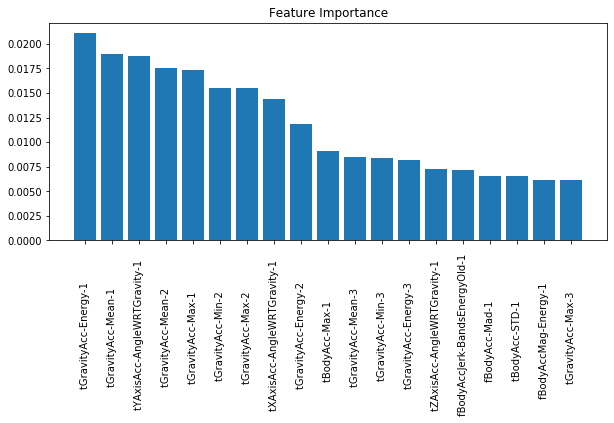

In [70]:
# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Rearrange feature names so they match the sorted feature importances
names = [col_name[0][i] for i in indices]

# Create plo
plt.figure(figsize=(10,4))

# Create plot title
plt.title("Feature Importance")

# Add bars
plt.bar(range(X_sm_test.shape[1])[1:20], importances[indices][1:20])

# Add feature names as x-axis labels
plt.xticks(range(X_sm_test.shape[1])[1:20], names[1:20],rotation=90)

# Show plot
plt.show()